In [1]:
import os, sys
sys.path.insert(0,os.path.pardir)
from src import DataProcessingModule as dp

In [2]:
dir_dict = {
        'raw' : '../data/raw',
        'clean' : '../data/clean_data',
        'process' : '../data/processed',
        'parser' : '../src/datastructure.json',
        'db' : '../data/db'
}
dp_class = dp.DataPreprocessing(dir_dict)

In [3]:
dp_class.processData()

file CPT DETAILES.LST is moving to raw directory
file full_data.csv is getting deleted from clean_data directory
>>>>> Data files are reset <<<<<<<
>>>>> Data cleaning starts <<<<<<<
new format is ../data/clean_data/full_data.csv
Text or lst file it is 
>>> Created New output File


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('../data/clean_data/full_data.csv', parse_dates={'ETD_DATETIME':['ETD_DATE','ETD_TD_TIME']})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101605 entries, 0 to 101604
Data columns (total 15 columns):
ETD_DATETIME             101605 non-null datetime64[ns]
ETD_WAYBILL_NO           101605 non-null int64
ETD_ROUTE_NO             101605 non-null int64
ETD_ROUTE_TYPE           101605 non-null int64
ETD_TICKET_TYPE          101605 non-null int64
ETD_ADULTS               101605 non-null int64
ETD_CHILD                101605 non-null int64
ETD_AMOUNT               101605 non-null int64
ETD_DEPOT_CODE           101605 non-null int64
ETD_BATTERY_VOLT         101605 non-null float64
ETD_CUR_STOP_NAME        101605 non-null object
ETD_DST_STOP_NAME        101605 non-null object
ETD_KMS                  101605 non-null int64
ETD_TICKET_TYPE_DESCR    101605 non-null object
ETD_TRIP_DIRECTION       101605 non-null object
dtypes: datetime64[ns](1), float64(1), int64(9), object(4)
memory usage: 11.6+ MB


In [7]:
df.head()

,ETD_DATETIME,ETD_WAYBILL_NO,ETD_ROUTE_NO,ETD_ROUTE_TYPE,ETD_TICKET_TYPE,ETD_ADULTS,ETD_CHILD,ETD_AMOUNT,ETD_DEPOT_CODE,ETD_BATTERY_VOLT,ETD_CUR_STOP_NAME,ETD_DST_STOP_NAME,ETD_KMS,ETD_TICKET_TYPE_DESCR,ETD_TRIP_DIRECTION
0,2018-02-25 12:13:32,373620,354,1,1,1,0,44,259,8.07,CHANNAPATNA,KENGERI,47,PASSENGER,D
1,2018-02-25 12:13:52,373620,354,1,1,2,0,30,259,8.06,CHANNAPATNA,RAMANAGARA,11,PASSENGER,D
2,2018-02-25 12:14:05,373620,354,1,1,1,0,50,259,8.04,CHANNAPATNA,MRBS,53,PASSENGER,D
3,2018-02-25 12:14:15,373620,354,1,1,1,0,44,259,8.08,CHANNAPATNA,KENGERI,47,PASSENGER,D
4,2018-02-25 12:15:06,373620,354,1,33,1,0,23,259,8.07,CHANNAPATNA,BIDADI,23,-----------,D


In [8]:
df.iloc[0]

ETD_DATETIME             2018-02-25 12:13:32
ETD_WAYBILL_NO                        373620
ETD_ROUTE_NO                             354
ETD_ROUTE_TYPE                             1
ETD_TICKET_TYPE                            1
ETD_ADULTS                                 1
ETD_CHILD                                  0
ETD_AMOUNT                                44
ETD_DEPOT_CODE                           259
ETD_BATTERY_VOLT                        8.07
ETD_CUR_STOP_NAME                CHANNAPATNA
ETD_DST_STOP_NAME                    KENGERI
ETD_KMS                                   47
ETD_TICKET_TYPE_DESCR              PASSENGER
ETD_TRIP_DIRECTION                         D
Name: 0, dtype: object

In [9]:
df.columns

Index(['ETD_DATETIME', 'ETD_WAYBILL_NO', 'ETD_ROUTE_NO', 'ETD_ROUTE_TYPE',
       'ETD_TICKET_TYPE', 'ETD_ADULTS', 'ETD_CHILD', 'ETD_AMOUNT',
       'ETD_DEPOT_CODE', 'ETD_BATTERY_VOLT', 'ETD_CUR_STOP_NAME',
       'ETD_DST_STOP_NAME', 'ETD_KMS', 'ETD_TICKET_TYPE_DESCR',
       'ETD_TRIP_DIRECTION'],
      dtype='object')

In [11]:
bus_identifier = "ETD_WAYBILL_NO"
route_identifier = "ETD_ROUTE_NO"
qualitative_variables = ["ETD_ROUTE_TYPE","ETD_TICKET_TYPE", "ETD_DEPOT_CODE", "ETD_CUR_STOP_NAME","ETD_DST_STOP_NAME",
                         "ETD_TRIP_DIRECTION"                        
                        ]

quantitative_variables = ["ETD_ADULTS","ETD_CHILD","ETD_AMOUNT", "ETD_BATTERY_VOLT", "ETD_KMS"]



#### Know your variables

In [52]:
# Know the time span of dataset
df["ETD_DATETIME"].describe()

count                  101605
unique                  99945
top       2018-07-06 08:14:18
freq                        3
first     2018-02-25 12:13:32
last      2019-01-14 12:15:17
Name: ETD_DATETIME, dtype: object

In [13]:
# No of buses running on no of routes
df["ETD_WAYBILL_NO"].nunique(), df["ETD_ROUTE_NO"].nunique()

(295, 39)

In [97]:
(df.groupby("ETD_ROUTE_NO").ETD_WAYBILL_NO.nunique() / df["ETD_WAYBILL_NO"].nunique())*100

ETD_ROUTE_NO
1      82.033898
2       1.355932
3       1.694915
8       1.016949
9       1.016949
15      0.677966
21      0.338983
34      0.338983
46      0.338983
47      0.338983
54      0.338983
59      0.677966
74      0.338983
75      0.338983
88      0.338983
125     0.338983
126     0.338983
128     0.338983
153     0.338983
164     3.050847
165     0.338983
166     0.338983
200     0.338983
201     0.338983
216     0.338983
252     0.677966
258     0.338983
301     3.050847
302     0.338983
320    94.915254
328     0.338983
334     0.338983
347     0.338983
350     0.338983
352    90.169492
354    18.305085
355     2.711864
359     0.338983
362     1.355932
Name: ETD_WAYBILL_NO, dtype: float64

Text(0,0.5,'No of buses percentage')

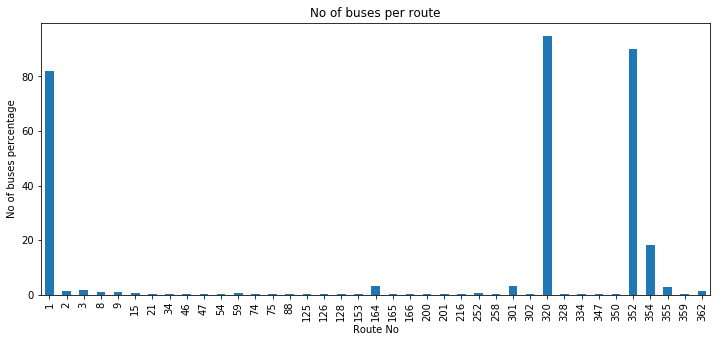

In [96]:
((df.groupby("ETD_ROUTE_NO").ETD_WAYBILL_NO.nunique() / df["ETD_WAYBILL_NO"].nunique())*100).plot(
    kind='bar', figsize=(12,5), title="No of buses per route"
)
plt.xlabel("Route No")
plt.ylabel("No of buses percentage")

In [98]:
# Type of routes and tickets on these route types
df["ETD_ROUTE_TYPE"].value_counts(normalize=True)*100

1    67.583288
2    32.416712
Name: ETD_ROUTE_TYPE, dtype: float64

Text(0,0.5,'Tickets Percentage')

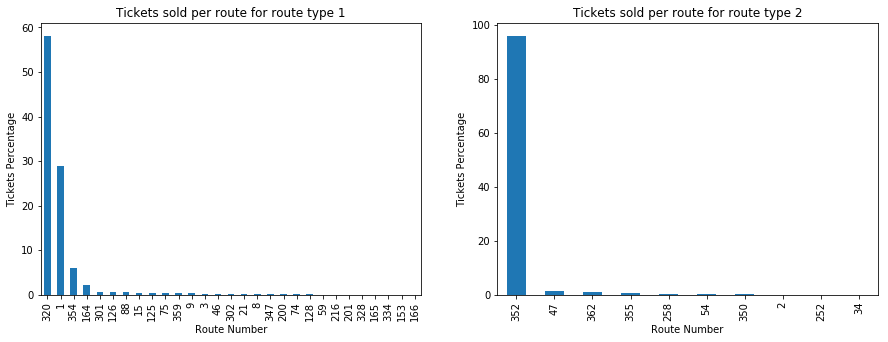

In [46]:
# Tickets sold per route number for give route type

fig, axes = plt.subplots(nrows=1,ncols=2)
route_type_1 = (df[df.ETD_ROUTE_TYPE == 1]["ETD_ROUTE_NO"].value_counts(normalize=True)*100)
route_type_2 = (df[df.ETD_ROUTE_TYPE == 2]["ETD_ROUTE_NO"].value_counts(normalize=True)*100)
route_type_1.plot(kind="bar", ax=axes[0], figsize=(15,5), title="Tickets sold per route for route type 1")
route_type_2.plot(kind="bar", ax=axes[1], figsize=(15,5), title="Tickets sold per route for route type 2")
axes[0].set_xlabel("Route Number")
axes[1].set_xlabel("Route Number")
axes[0].set_ylabel("Tickets Percentage")
axes[1].set_ylabel("Tickets Percentage")

In [100]:
df["ETD_TICKET_TYPE"].nunique()

28

Text(0,0.5,'Tickets Percentage')

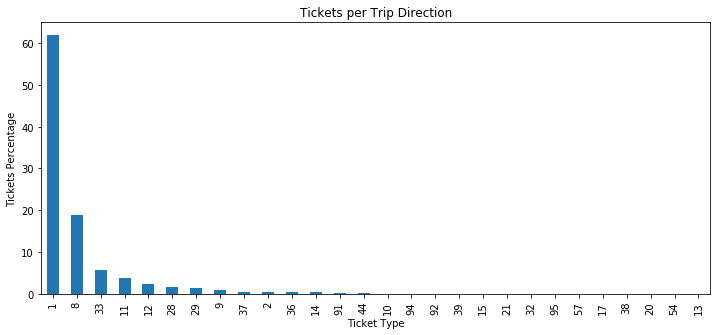

In [86]:
# Type of tickets sold
(df["ETD_TICKET_TYPE"].value_counts(normalize=True)*100).plot(kind='bar', figsize=(12,5), title="Tickets per Trip Direction")

plt.xlabel("Ticket Type")
plt.ylabel("Tickets Percentage")


In [57]:
# How many bus depots
df["ETD_DEPOT_CODE"].unique()

array([259])

In [59]:
# How many stops are there
df["ETD_CUR_STOP_NAME"].nunique(), df["ETD_DST_STOP_NAME"].nunique()

(241, 239)

In [105]:
# No of bus stops
len(set(list(df["ETD_CUR_STOP_NAME"].unique()) + list(df["ETD_DST_STOP_NAME"].unique())))

244

Text(0,0.5,'Tickets Percentage')

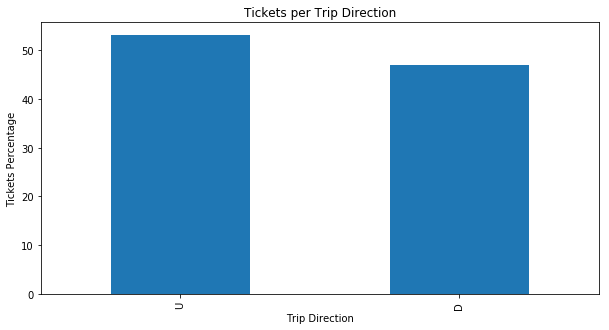

In [85]:
# Tickets distribution per Trip direction
(df["ETD_TRIP_DIRECTION"].value_counts(normalize=True)*100).plot(kind='bar', figsize=(10,5), title="Tickets per Trip Direction")
plt.xlabel("Trip Direction")
plt.ylabel("Tickets Percentage")

In [74]:
# No of adults and children throught the year
df["ETD_ADULTS"].sum(), df["ETD_CHILD"].sum()

(111075, 2483)

In [76]:
# Describe amount
df.ETD_AMOUNT.describe()

count    101605.000000
mean         54.365838
std          79.634673
min           0.000000
25%           0.000000
50%          35.000000
75%          68.000000
max        1926.000000
Name: ETD_AMOUNT, dtype: float64

Text(0.5,1,'Expense Distribution')

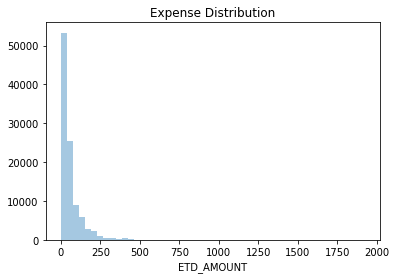

In [108]:
sns.distplot(df.ETD_AMOUNT)
plt.title("Expense Distribution")

In [77]:
# Describe distance between stops in Kilometers
df.ETD_KMS.describe()

count    101605.000000
mean         47.834329
std          52.014028
min          -6.000000
25%           6.000000
50%          38.000000
75%          59.000000
max         563.000000
Name: ETD_KMS, dtype: float64

Text(0.5,1,'Distance between stops Distribution')

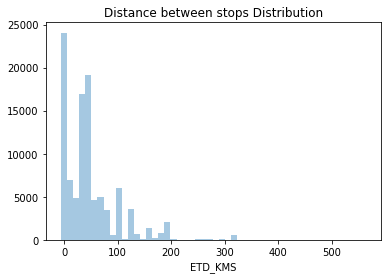

In [111]:
sns.distplot(df.ETD_KMS,kde=False )
plt.title("Distance between stops Distribution")

In [80]:
df[df.ETD_KMS < 0].ETD_KMS.unique()

array([-6, -3])

In [81]:
df.ETD_BATTERY_VOLT.describe()

count    101605.000000
mean          7.944252
std           0.189761
min           6.840000
25%           7.810000
50%           7.960000
75%           8.100000
max           8.320000
Name: ETD_BATTERY_VOLT, dtype: float64

Text(0.5,1,'Battery Volt Distribution')

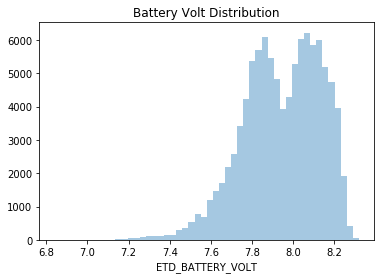

In [109]:
sns.distplot(df.ETD_BATTERY_VOLT, kde=False)
plt.title("Battery Volt Distribution")

### Exploratory Data Analysis Result

- The timeline for this dataset spans from 25 Feb 2018 to 14 Jan 2019, almost 1 year data.
- There are 8 qualtitative variables and 5 quantitative variables.

#### Qualitative Variables Understanding
- There are 295 buses and 39 routes. Most of the buses are running on routes 1, 320 and 352.
- There were 68% of tickets sold on route type 1 and so 32% of tickets sold on route type 2.
- Most busy routes 1 and 320 belongs to route type 1 and 352 belongs to route type 2
- There 28 ticket types. Most ticktets sold on ticket type 1 which is more than 60% of the data.
- This whole data set belongs to only one depot, which is 259.
- There are 244 bus stops.
- More than 50% of tickets were sold for upward direction.

#### Quantitative Variables Understanding
- There were 111075 adults bought tickets and there were 2483 children got tickets throught the year.
- On average the expense per ticket is 54. Though the distributions is highly skewed towards right side.
- Most of the tickets sold for short distances.
- Battery voltage distribution has very less standard deviation. Maximum observations varies between 7.6 to 8.2.